<h3>Calidad de un vino</h3>

a) Carge los dos dataset en un unico dataframe de pandas, ademas de agregar una columna indicando si
es vino tinto o blanco. Describa el dataset a trabajar.

In [63]:
import pandas as pd
df_red = pd.read_csv("winequality-red.csv",sep=";")
df_white = pd.read_csv("winequality-white.csv",sep=";")
df = pd.concat([df_red,df_white], axis=0,ignore_index=True)

In [99]:
from IPython.display import display, HTML
#-1 == red wine; +1 == white wine
df['tipo'] = ['-1' if cond < df_red.shape[0] else '+1' for cond in df.index.values]
display(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo,good_quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,-1,0
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5,-1,0
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5,-1,0
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6,-1,1
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,-1,0
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5,-1,0
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5,-1,0
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7,-1,1
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7,-1,1
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,-1,0


b) Aborde este problema como si fuera de clasificacion binaria para predecir si un vino es de buena calidad
o no, es decir, utilice las distintas caracteristicas fisioquimicas presentes en los datos para estimar esta
etiqueta. Para esto cree las matrices de entrenamiento y de pruebas, ademas de la etiqueta para ambos
conjuntos, considerando como quality mayor a 5 un vino de buena calidad. El conjunto de pruebas
(25 %) sera utilizado unicamente para verificar la calidad de los algoritmos a entrenar.

In [238]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df['good_quality'] = [1 if q > 5 else 0 for q in df.quality]
#train, test = train_test_split(df, test_size=0.25)
X_train, X_test, y_train, y_test = train_test_split(df[df.columns.difference(['good_quality','quality','tipo'])], df['good_quality'], test_size=0.25, random_state = 50)
display(test)
print("red: %s, white: %s" % (test.loc[df['tipo'] == '-1'].shape[0],test.loc[df['tipo'] == '+1'].shape[0]))
print("train samples: %s, target: %s" % (X_train.shape, y_train.shape))
print("test samples: %s, target: %s" % (X_test.shape, y_test.shape))
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo,good_quality
1785,6.7,0.240,0.41,9.40,0.040,49.0,166.0,0.99540,3.12,0.61,9.900000,6,white,1
5015,7.2,0.370,0.40,11.60,0.032,34.0,214.0,0.99630,3.10,0.51,9.800000,6,white,1
2809,9.2,0.280,0.41,1.00,0.042,14.0,59.0,0.99220,2.96,0.25,10.500000,6,white,1
1125,8.8,0.240,0.35,1.70,0.055,13.0,27.0,0.99394,3.14,0.59,11.300000,7,red,1
348,9.6,0.560,0.31,2.80,0.089,15.0,46.0,0.99790,3.11,0.92,10.000000,6,red,1
4857,7.4,0.190,0.31,14.50,0.045,39.0,193.0,0.99860,3.10,0.50,9.200000,6,white,1
843,7.1,0.685,0.35,2.00,0.088,9.0,92.0,0.99630,3.28,0.62,9.400000,5,red,0
1900,8.3,0.200,0.35,0.90,0.050,12.0,74.0,0.99200,3.13,0.38,10.500000,6,white,1
1602,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6,white,1
195,7.8,0.590,0.33,2.00,0.074,24.0,120.0,0.99680,3.25,0.54,9.400000,5,red,0


red: 376, white: 1249
train samples: (4872, 11), target: (4872L,)
test samples: (1625, 11), target: (1625L,)


,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
675,10.2,0.064,0,0.99840,9.3,12.0,3.26,0,0.65,31.0,0.41
3948,9.5,0.168,0,0.99782,7.9,19.0,3.06,0,0.62,184.0,0.46
1739,10.2,0.045,0,0.99270,6.3,20.0,3.30,0,0.43,77.0,0.31
2940,10.4,0.029,0,0.99310,7.6,13.0,3.04,0,0.33,151.0,0.54
6079,12.8,0.120,0,0.99636,5.9,55.0,3.10,0,0.35,122.0,0.22


c) Entrene un solo Arbol de Clasificacion de multiples niveles para resolver el problema. Puede variar los
hiper-parametros que prefiera, recuerde que las decisiones no pueden ser basadas mirando el conjunto
de pruebas. Debido al desbalanceo que se produce en las dos clases mida la metrica F1-score [5] sobre
el conjunto de entrenamiento y de pruebas.

In [281]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
clf_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    min_samples_split = 2,
    max_depth = 40,
    min_samples_leaf = 1,
    random_state = 1,
    presort = True,
    min_impurity_split  = 0.49
    )
clf_tree = clf_tree.fit(X_train, y_train)
scores = cross_val_score(clf_tree, X_train, y_train, cv=10)
#clf_score_train = clf_tree.score(X_train, y_train)
print ("cross-validation: %s" % (scores))
print ("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

cross-validation: [ 0.72131148  0.7397541   0.74385246  0.74743326  0.79466119  0.7412731
  0.7926078   0.73921971  0.79466119  0.75102881]
Accuracy: 0.75658 (+/- 0.05114)


In [282]:
clf_score_test = clf_tree.score(X_test, y_test)
print ("score test: %s" % (clf_score_test))

def score_the_model(model,x,y,xt,yt):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print "Training Accuracy: %f"%(acc_tr)
    print "Test Accuracy: %f"%(acc_test)
    print "Detailed Analysis Testing Results ..."
    print(classification_report(yt, model.predict(xt), target_names=["-1","+1"]))
score_the_model(clf_tree, X_train, y_train, X_test, y_test)

score test: 0.799384615385
Training Accuracy: 0.953818
Test Accuracy: 0.799261
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

         -1       0.74      0.68      0.71       585
         +1       0.83      0.86      0.85      1040

avg / total       0.80      0.80      0.80      1625



d) Entrene un ensamblador de arboles de multiples niveles, mediante la tecnica de Random Forest. Varie la
cantidad de arboles de decision utilizados en el ensamblado (n_estimators), realice un grafico resumen
del F1-score de entrenamiento y de pruebas en funcion de este hiper-parametro.

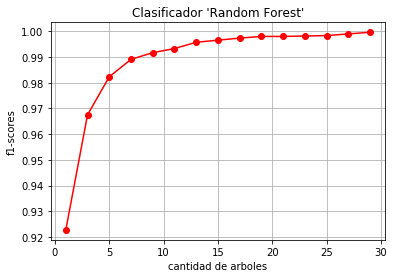

In [283]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

f1_scores_rfc = []
estimators_rfc = np.arange(start=1, stop=30, step=2, dtype=int)
for i in estimators_rfc:
    model = RandomForestClassifier(n_estimators=i, max_depth=50,n_jobs=-1, random_state = 50)
    model.fit(X_train, y_train)
    f1_scores_rfc.append(f1_score(y_train, model.predict(X_train)))
    
plt.figure()
plt.title("Clasificador 'Random Forest'")
plt.xlabel("cantidad de arboles")
plt.ylabel("f1-scores")
plt.grid()
plt.plot(estimators_rfc, f1_scores_rfc, 'o-', color="r")
plt.show()

e) Entrene un ensamblador de arboles de multiples niveles, mediante la tecnica de AdaBoost. Vare la
cantidad de arboles de decision utilizados en el ensamblado (n estimators), realice un graco resumen
del F1-score de entrenamiento y de pruebas en funcion de este hiper-parametro. Compare y analice con
la tecnica utilizada en d).

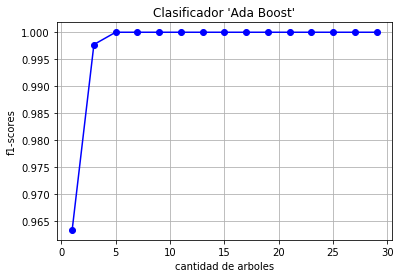

In [288]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

f1_scores_abc = []
estimators_abc = np.arange(start=1, stop=30, step=2, dtype=int)
for i in estimators_abc:
    model = AdaBoostClassifier(base_estimator=clf_tree, n_estimators=i, random_state = 50)
    model.fit(X_train, y_train)
    f1_scores_abc.append(f1_score(y_train, model.predict(X_train)))

plt.figure()
plt.title("Clasificador 'Ada Boost'")
plt.xlabel("cantidad de arboles")
plt.ylabel("f1-scores")
plt.grid()
plt.plot(estimators_abc, f1_scores_abc, 'o-', color="b")
plt.show()

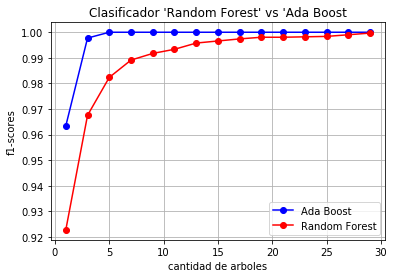

In [289]:
plt.figure()
plt.title("Clasificador 'Random Forest' vs 'Ada Boost")
plt.xlabel("cantidad de arboles")
plt.ylabel("f1-scores")
plt.grid()
plt.plot(estimators_abc, f1_scores_abc, 'o-', color="b", label="Ada Boost")
plt.plot(estimators_rfc, f1_scores_rfc, 'o-', color="r", label="Random Forest")
plt.legend(loc="best")
plt.show()

f) Entrene alguna otra maquina de aprendizaje, elegida por usted, para resolver este problema. Elija los
hiper-parametros que estime convenientes intentando aumentar el F1-score obtenido por los algoritmos
anteriores. Compare y analice estas 4 maneras de resolver el problema denido en b).

g) Defina un criterio para estimar la importancia de los distintos atributos en el ensamblado de Ran-
dom Forest, implementelo sobre alguno de los ensambladores entrenados en d), haga un ranking de
importancia de atributos ¿Es posible implementar este criterio sobre una tecnica de boost como lo es
AdaBoost?

In [290]:
<h3>Reconocimiento de Im\ágenes Sign Gestures</h3>

SyntaxError: invalid syntax (<ipython-input-290-534c6a81d178>, line 1)